In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [11]:
#input data
df = pd.read_excel('IND.xlsx')
df.head()

,year,creditor,debtor,indicator,debt
0,1970,WLD,IND,DT.DOD.DECT.CD,8.425121e+09
1,1971,WLD,IND,DT.DOD.DECT.CD,9.328742e+09
2,1972,WLD,IND,DT.DOD.DECT.CD,1.002927e+10
3,1973,WLD,IND,DT.DOD.DECT.CD,1.096592e+10
4,1974,WLD,IND,DT.DOD.DECT.CD,1.269695e+10


In [12]:
X = df[['year']]
y = df['debt']

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100,  random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)


In [13]:
# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


# Print results
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")


MAE: 13354708396.073147
MSE: 4.5603324583388244e+20
RMSE: 21354934929.28233
MAPE: 21.339239987188304%


In [14]:
# Create a new DataFrame for the next 10 years
future_years = pd.DataFrame({'year': range(df['year'].max() + 1, df['year'].max() + 11)})

# Predictions for the next 10 years
y_pred_future = rf_model.predict(future_years)


future_forecast = pd.DataFrame({'year': future_years['year'], 'predicted_debt': y_pred_future})

# Print forecasted values
print(future_forecast)

   year  predicted_debt
0  2024    6.065106e+11
1  2025    6.065106e+11
2  2026    6.065106e+11
3  2027    6.065106e+11
4  2028    6.065106e+11
5  2029    6.065106e+11
6  2030    6.065106e+11
7  2031    6.065106e+11
8  2032    6.065106e+11
9  2033    6.065106e+11


In [15]:
# Predict debt for the original dataset
df['predicted_debt'] = rf_model.predict(df[['year']])

# Calculate residuals (Actual - Predicted)
df['residual'] = df['debt'] - df['predicted_debt']

# Print the dataset with actual debt, predicted debt, and residuals
print(df[['year', 'debt', 'predicted_debt', 'residual']])

    year          debt  predicted_debt      residual
0   1970  8.425121e+09    2.013078e+10 -1.170566e+10
1   1971  9.328742e+09    2.013078e+10 -1.080204e+10
2   1972  1.002927e+10    2.013078e+10 -1.010151e+10
3   1973  1.096592e+10    2.013078e+10 -9.164864e+09
4   1974  1.269695e+10    2.013078e+10 -7.433829e+09
5   1975  1.386561e+10    2.013078e+10 -6.265168e+09
6   1976  1.458639e+10    2.013078e+10 -5.544392e+09
7   1977  1.541466e+10    2.013078e+10 -4.716124e+09
8   1978  1.652025e+10    2.013078e+10 -3.610533e+09
9   1979  1.819038e+10    2.225426e+10 -4.063878e+09
10  1980  2.072336e+10    2.225426e+10 -1.530902e+09
11  1981  2.248007e+10    2.520364e+10 -2.723570e+09
12  1982  2.694286e+10    2.520364e+10  1.739216e+09
13  1983  3.064949e+10    3.153403e+10 -8.845342e+08
14  1984  3.276396e+10    3.153403e+10  1.229935e+09
15  1985  3.893481e+10    3.842806e+10  5.067563e+08
16  1986  4.490944e+10    4.156546e+10  3.343978e+09
17  1987  5.342490e+10    5.551307e+10 -2.0881

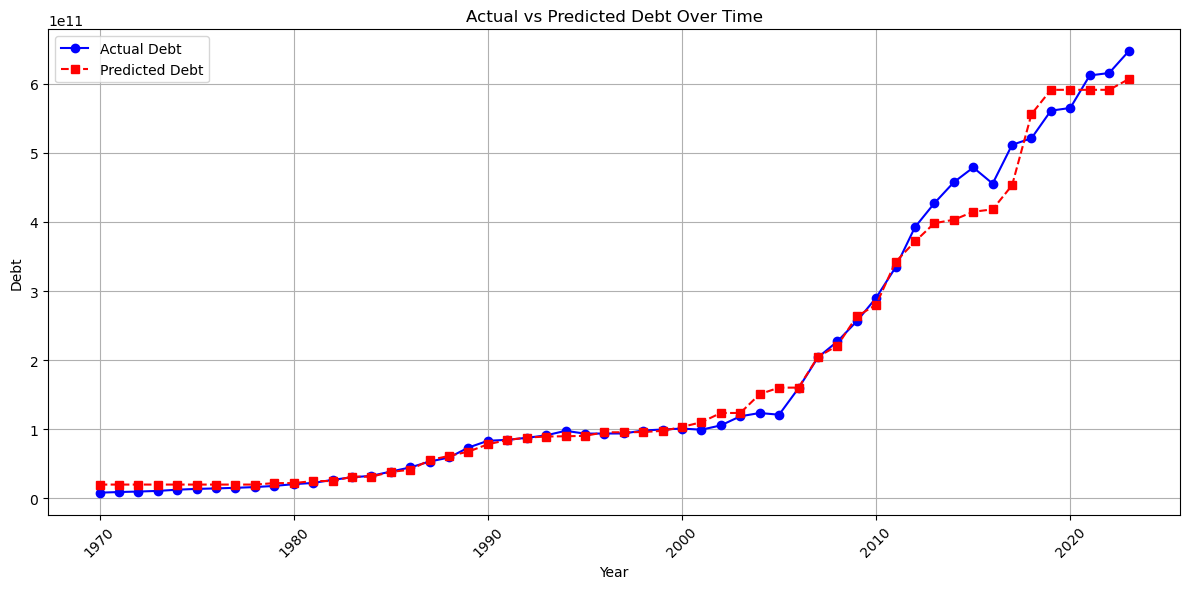

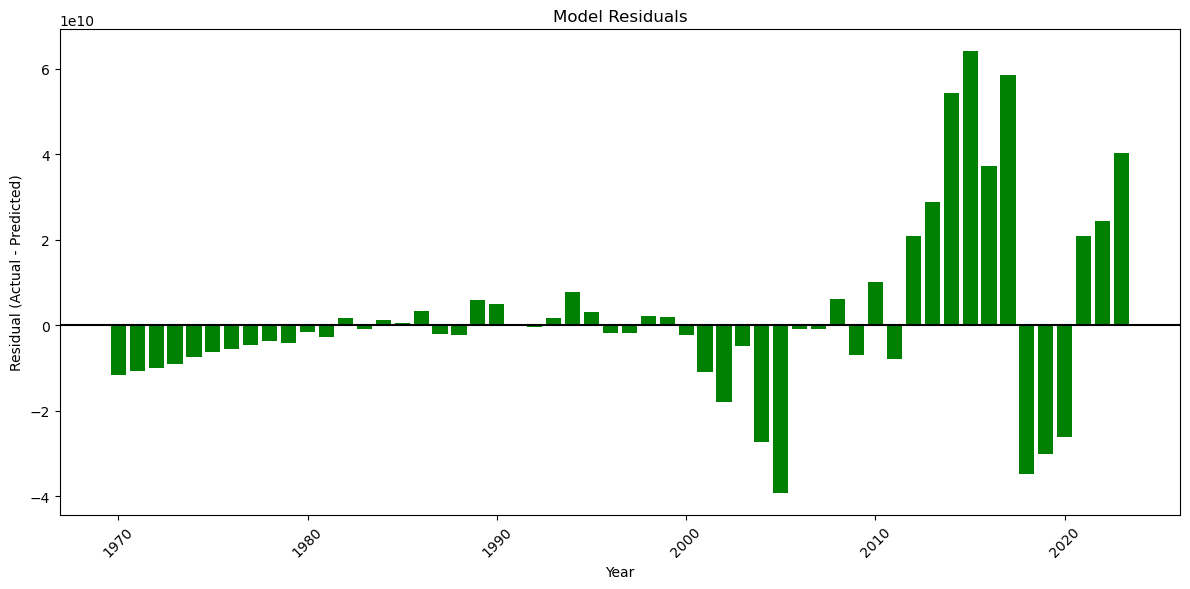

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['debt'], 'o-', color='blue', label='Actual Debt')
plt.plot(df['year'], df['predicted_debt'], 's--', color='red', label='Predicted Debt')
plt.xlabel('Year')
plt.ylabel('Debt')
plt.title('Actual vs Predicted Debt Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot residuals
plt.figure(figsize=(12, 6))
plt.bar(df['year'], df['residual'], color='green')
plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Model Residuals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

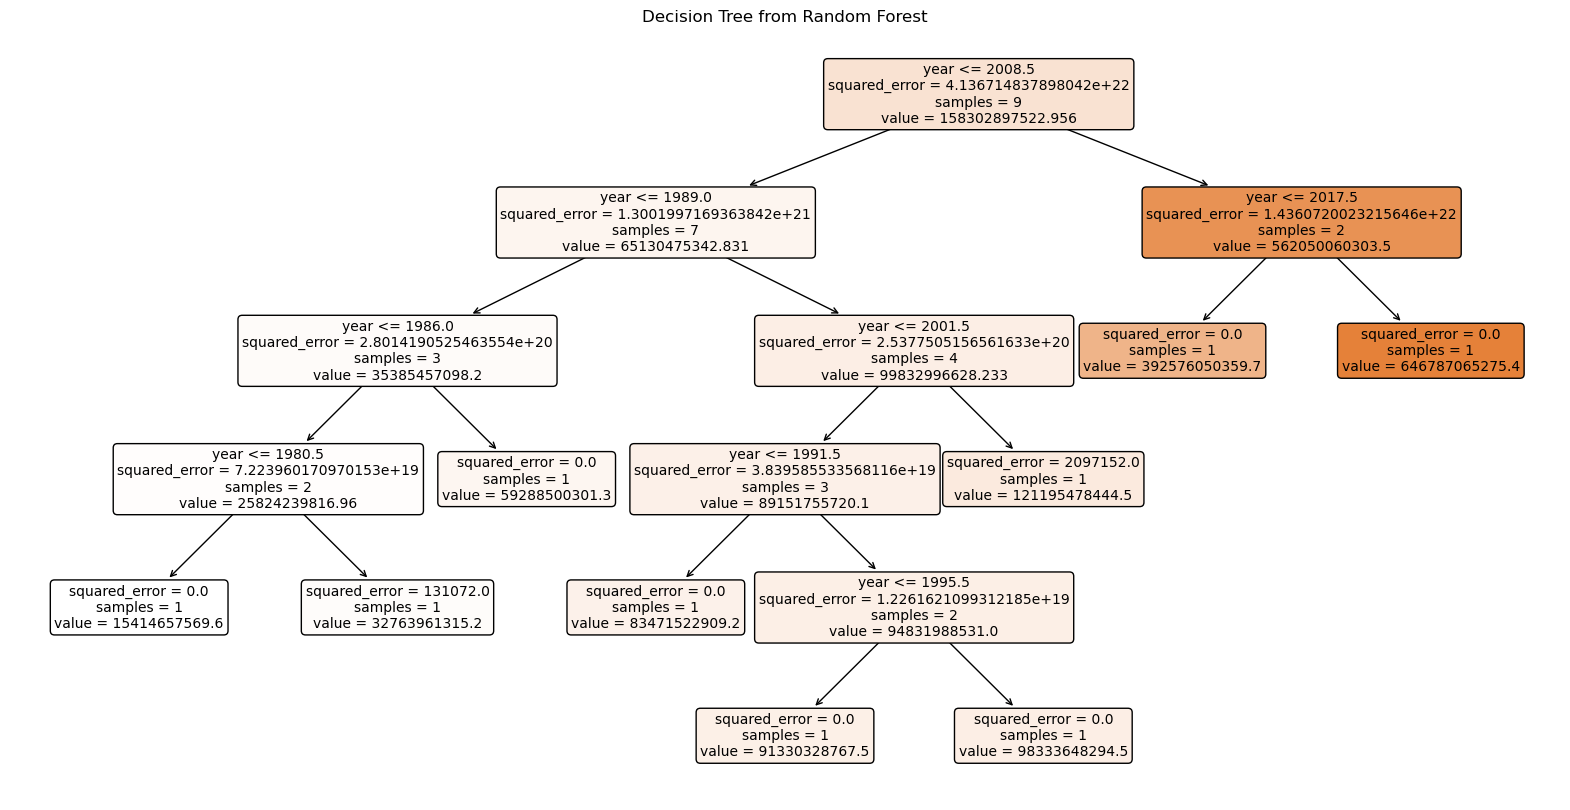

In [17]:
# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = rf_model.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

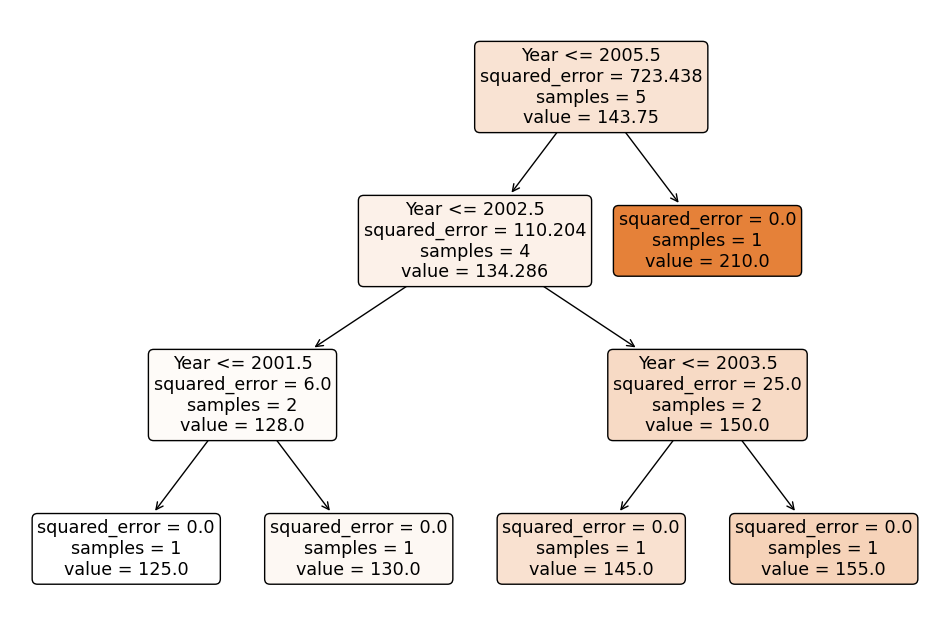

In [18]:
#sample
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

# Data
years = np.array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007]).reshape(-1, 1)
debt = np.array([120, 125, 130, 145, 155, 170, 190, 210])

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=1, random_state=42)  # Single tree for visualization
rf.fit(years, debt)

# Visualize the first tree
plt.figure(figsize=(12, 8))
plot_tree(rf.estimators_[0], feature_names=["Year"], filled=True, rounded=True)
plt.show()


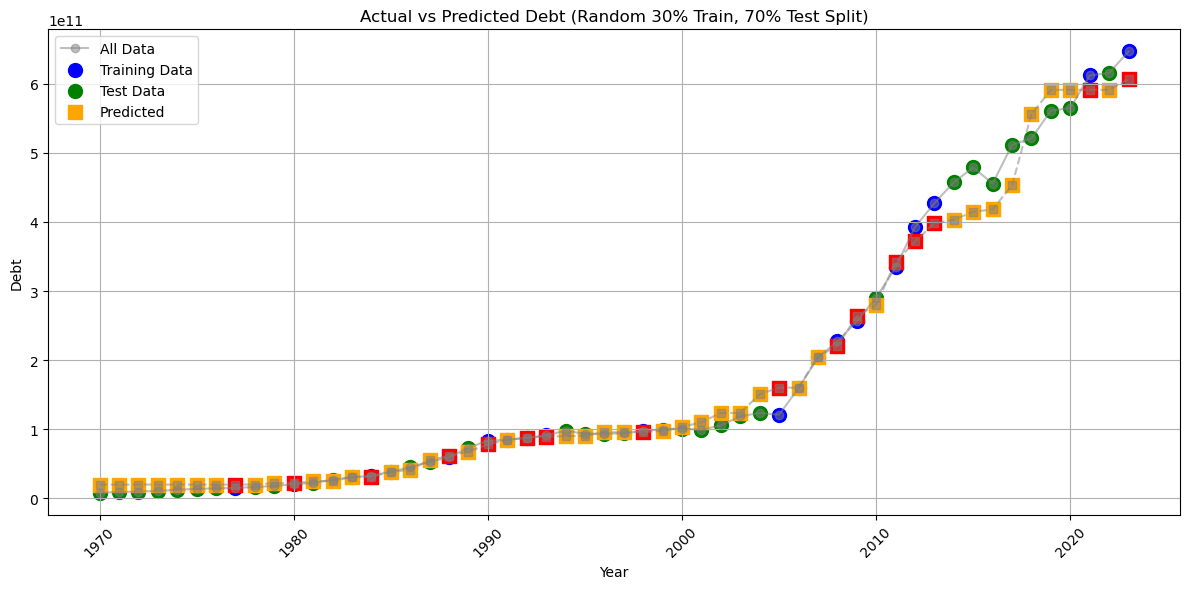

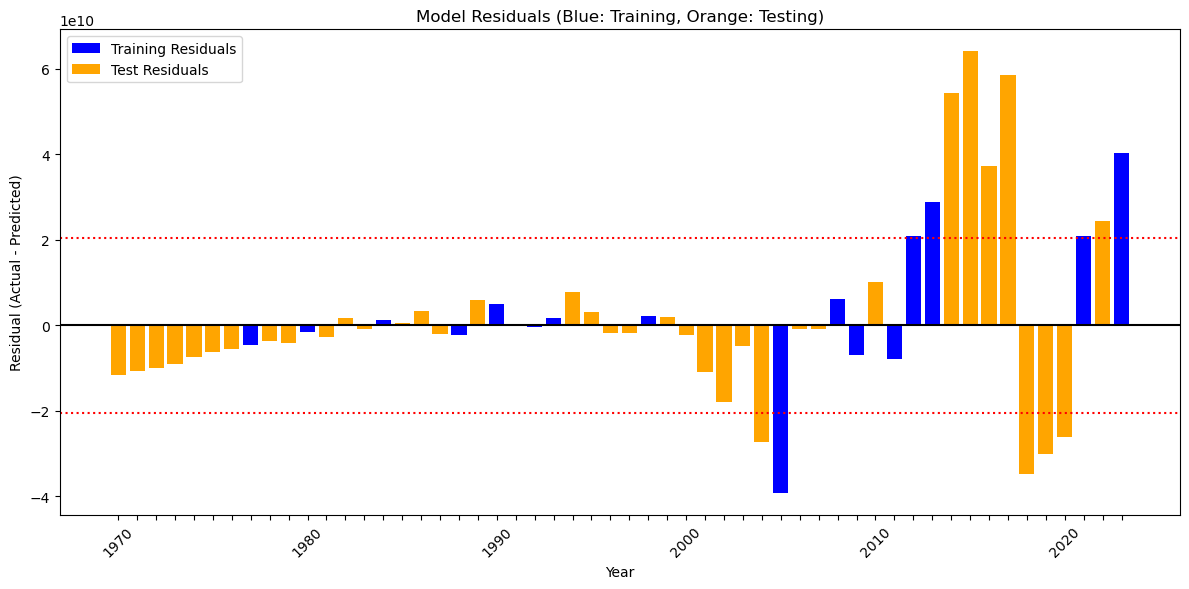

In [23]:
# Get the indices of the training and testing sets
train_indices = X_train.index
test_indices = X_test.index

# Create a new column in df to mark train/test split
df['split'] = 'test'  # Default all to test
df.loc[train_indices, 'split'] = 'train'  # Mark training data

# Sort the dataframe by year for plotting
df_sorted = df.sort_values('year')

# Make predictions for all data points for visualization
X_all = df[['year']]
df['predicted_debt'] = rf_model.predict(X_all)

# Calculate residuals
df['residual'] = df['debt'] - df['predicted_debt']

# Plot Actual vs Predicted Debt with train-test split indicators
plt.figure(figsize=(12, 6))

# Plot all data points
plt.plot(df_sorted['year'], df_sorted['debt'], 'o-', color='gray', alpha=0.5, label='All Data')
plt.plot(df_sorted['year'], df_sorted['predicted_debt'], 's--', color='gray', alpha=0.5)

# Highlight training points
train_data = df_sorted[df_sorted['split'] == 'train']
plt.scatter(train_data['year'], train_data['debt'], color='blue', s=100, label='Training Data')
plt.scatter(train_data['year'], train_data['predicted_debt'], color='red', marker='s', s=100)

# Highlight testing points
test_data = df_sorted[df_sorted['split'] == 'test']
plt.scatter(test_data['year'], test_data['debt'], color='green', s=100, label='Test Data')
plt.scatter(test_data['year'], test_data['predicted_debt'], color='orange', marker='s', s=100, label='Predicted')

plt.xlabel('Year')
plt.ylabel('Debt')
plt.title('Actual vs Predicted Debt (Random 30% Train, 70% Test Split)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot residuals with different colors for train and test sets
plt.figure(figsize=(12, 6))

# Get year positions for bars
x_positions = np.arange(len(df_sorted))
bar_width = 0.8

# Plot bars with different colors for train and test
for i, (_, row) in enumerate(df_sorted.iterrows()):
    color = 'blue' if row['split'] == 'train' else 'orange'
    plt.bar(x_positions[i], row['residual'], color=color, width=bar_width)

# Add horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-')

# Add horizontal lines for standard deviation of residuals
std_dev = df['residual'].std()
plt.axhline(y=std_dev, color='red', linestyle=':', label='+1 σ')
plt.axhline(y=-std_dev, color='red', linestyle=':', label='-1 σ')

# Add a custom legend for the residuals plot
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='blue', label='Training Residuals'),
    Patch(facecolor='orange', label='Test Residuals'),
]
plt.legend(handles=legend_elements)

# Get all years from the sorted dataframe
all_years = df_sorted['year'].values

# Create tick positions for all years but only label every 10th year
tick_positions = np.arange(len(all_years))
tick_labels = []

for year in all_years:
    # Add label for decade years (years divisible by 10)
    if year % 10 == 0:
        tick_labels.append(str(int(year)))
    else:
        # Empty string for non-decade years
        tick_labels.append('')

# Set x-ticks to show marks for all years but only label decade years
plt.xticks(tick_positions, tick_labels, rotation=45)

plt.xlabel('Year')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Model Residuals (Blue: Training, Orange: Testing)')
plt.tight_layout()
plt.show()
